## Radiative Flux Variation of Pleiades Stars

This notebook reconstructs and visualizes the radiative flux variations of the seven brightest Pleiades stars (Alcyone, Atlas, Electra, Maia, Merope, Taygeta, and Pleione) using Fourier parameters from provided CSV files.

Light curves are graphs that show the brightness of an object over a period of time. In the study of objects which change their brightness over time, such as novae, supernovae, and variable stars, the light curve is a simple but valuable tool to a scientist.

The light curves are reconstructed from the figure in the paper below and contains seven subplots showing the flux variations over time for each star.

This analysis is based on the data and methodology from:
[White, T. R., Pope, B. J. S., Antoci, V., et al. (2017). "Beyond the Kepler/K2 bright limit: variability in the seven brightest members of the Pleiades." 
MNRAS, 471(3), 2882-2901. doi:10.1093/mnras/stx1050](https://academic.oup.com/mnras/article/471/3/2882/4081952?login=false)


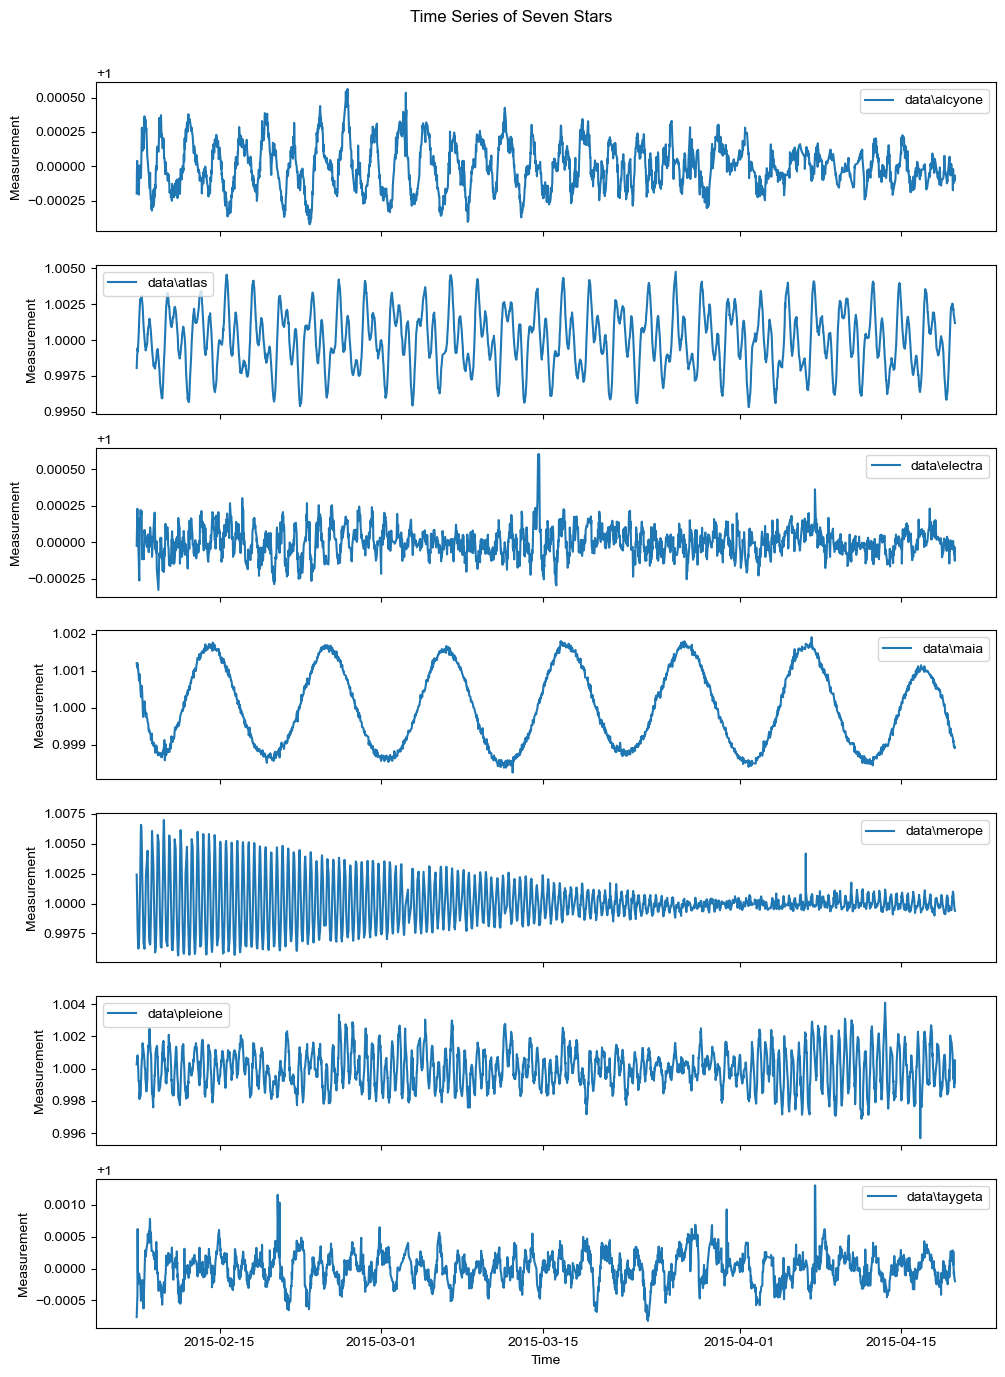

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Get a list of all CSV files matching the pattern
file_paths = glob.glob("./data/*recreated-ts.csv")  # Adjust path if necessary
file_paths.sort()  # Ensure consistent ordering

# Define figure and subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 14), sharex=True)
fig.suptitle("Time Series of Seven Stars")

# Loop through files and plot each in its respective subplot
for ax, file_path in zip(axes, file_paths):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Extract time and measurement columns
    time_col = df.columns[1]  # Assuming first column is time
    value_col = df.columns[2]  # Assuming second column is the measurement

    # Convert to datetime first
    reference_date = pd.Timestamp('2009-01-01')
    df[time_col] = reference_date + pd.to_timedelta(df[time_col], unit='days')

    # Plot the data
    ax.plot(df[time_col], df[value_col], label=file_path.split("/")[-1].replace("-recreated-ts.csv", ""))
    ax.set_ylabel("Measurement")
    ax.legend()

# Set common x-axis label
axes[-1].set_xlabel("Time")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("./figures/light_curves_figure.png", dpi=300, bbox_inches="tight")
plt.show()


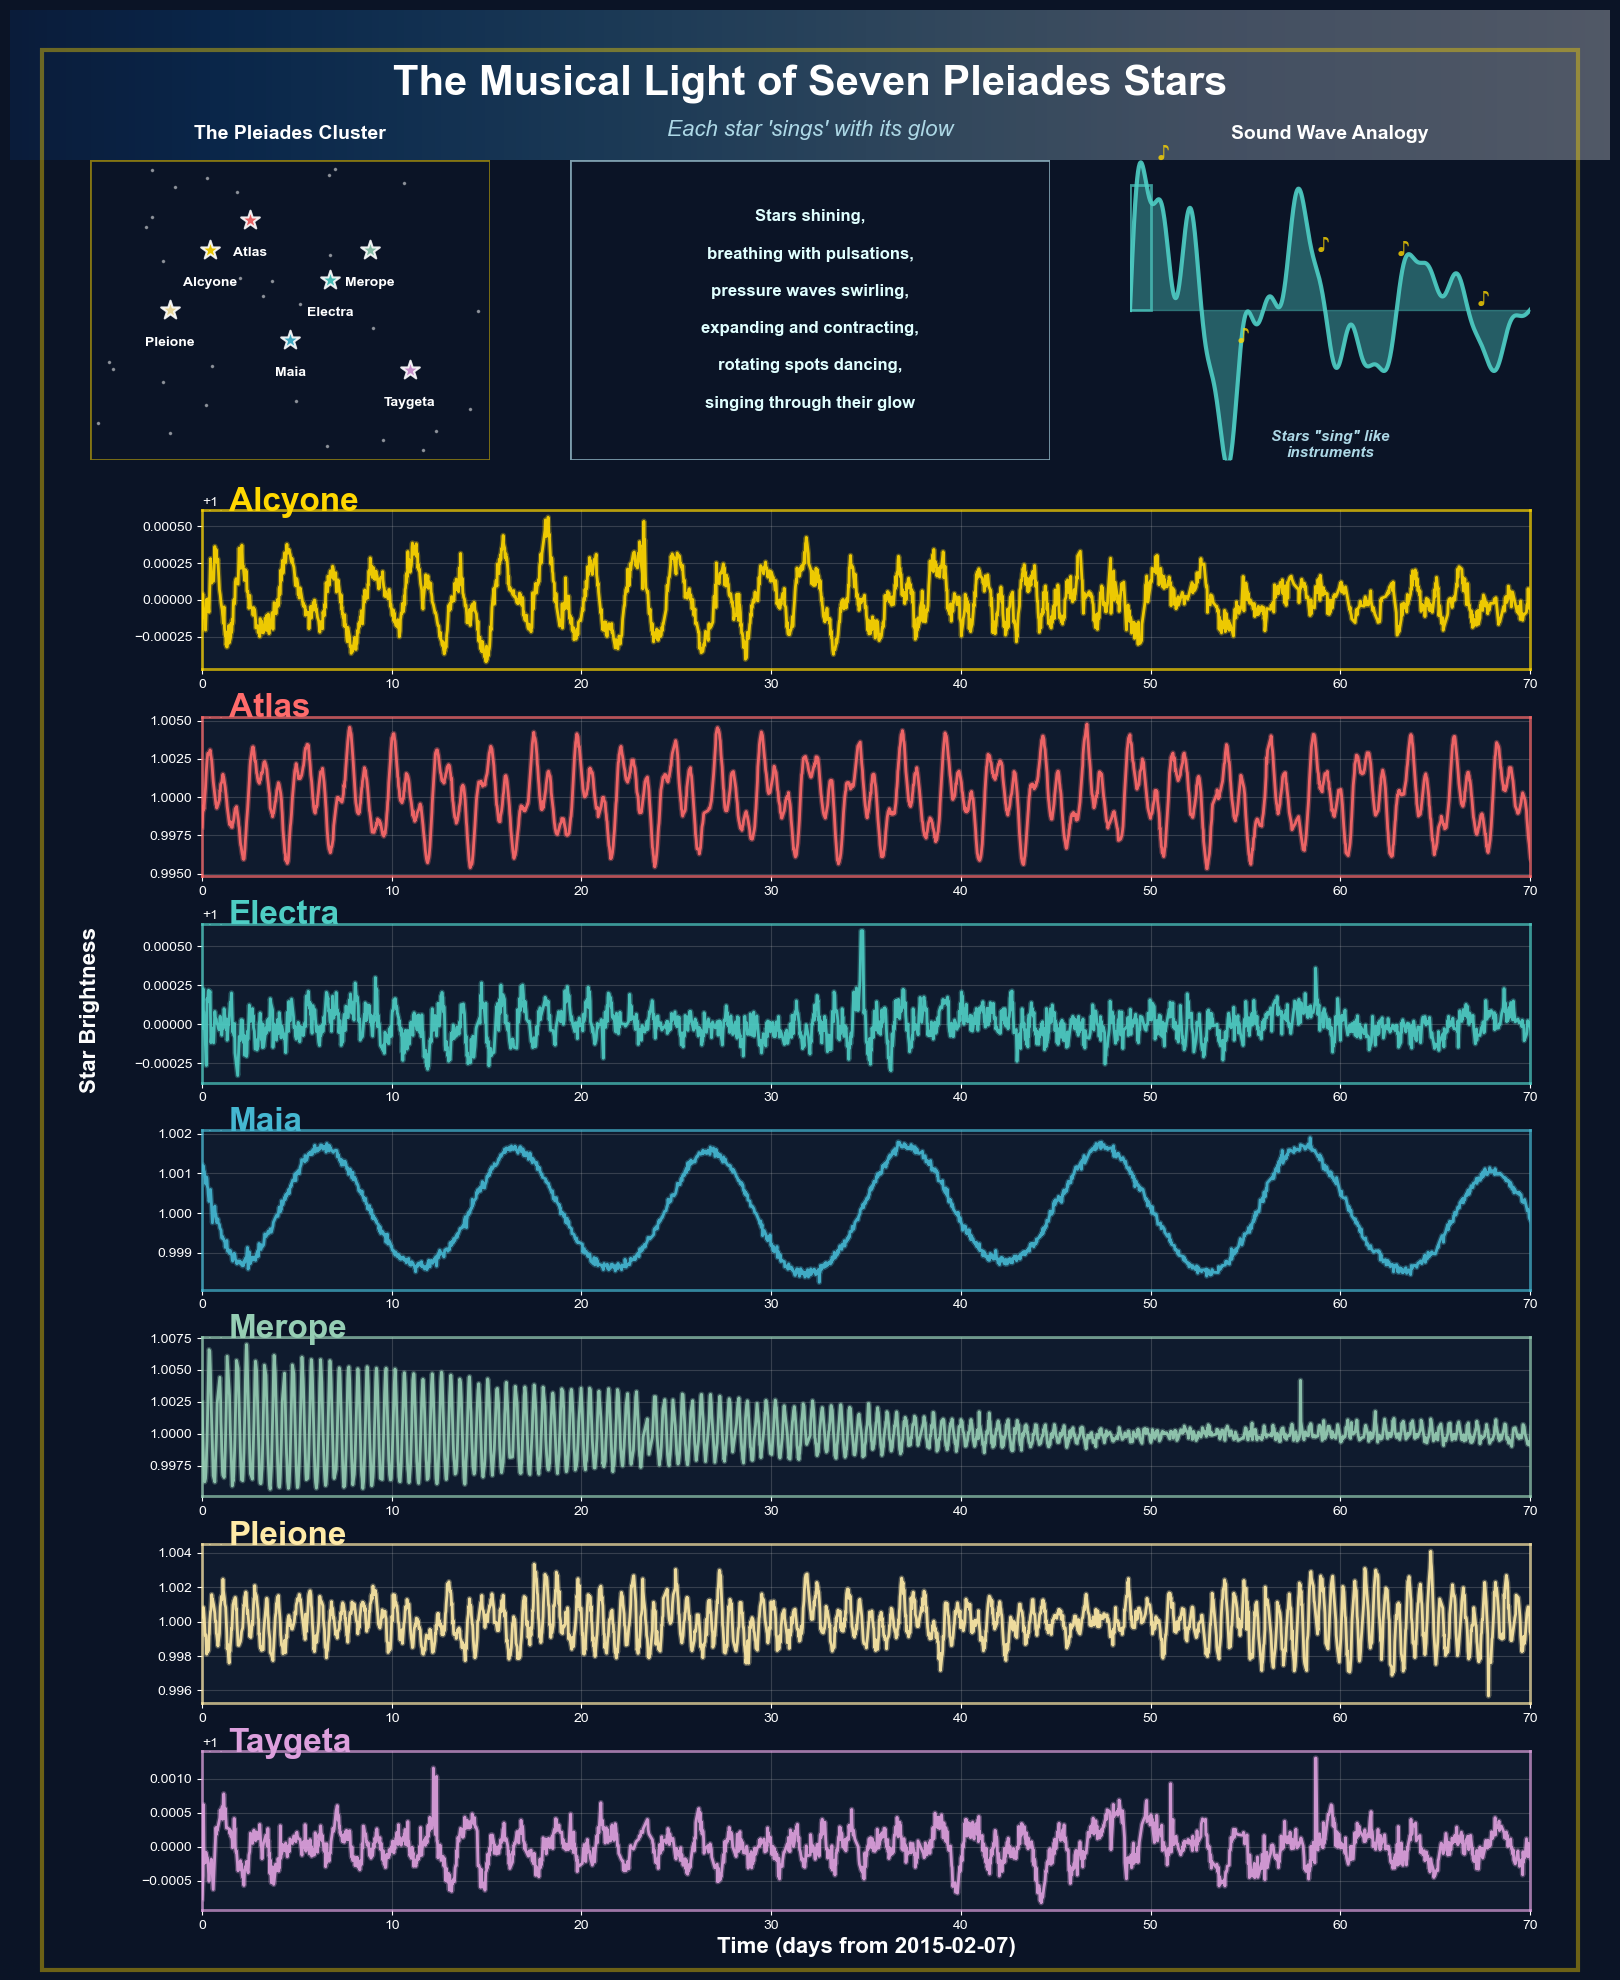

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib.patches import Circle
import matplotlib.patches as patches
# Add this at the top of your code:
plt.rcParams['font.family'] = ['Segoe UI Symbol', 'Arial', 'DejaVu Sans']
# Use standard Windows fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Calibri', 'DejaVu Sans']
plt.rcParams['font.size'] = 10

# Warm, space-inspired color palette
colors = ['#FFD700', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
file_paths = glob.glob("./data/*recreated-ts.csv")
file_paths.sort()

# Create figure with space background
fig = plt.figure(figsize=(16, 20))
fig.patch.set_facecolor('#0B1426')  # Deep space blue

# Create the layout: header section + light curves
# Header takes top 25%, light curves take bottom 75%
header_height = 0.25
curves_height = 0.70
bottom_margin = 0.05

# ===== HEADER SECTION =====
# Main title
title_ax = fig.add_axes([0, 1-header_height*0.3, 1, header_height*0.3])
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))
title_ax.imshow(gradient, aspect='auto', cmap='Blues_r', alpha=0.3)
title_ax.text(0.5, 0.5, "The Musical Light of Seven Pleiades Stars", 
              ha='center', va='center', transform=title_ax.transAxes,
              fontsize=30, fontweight='bold', color='white')
title_ax.text(0.5, 0.2, "Each star 'sings' with its glow", 
              ha='center', va='center', transform=title_ax.transAxes,
              fontsize=16, style='italic', color='lightblue')
title_ax.axis('off')

# Header content area (3 columns: cluster, text, sound wave)
header_content_ax = fig.add_axes([0, 1-header_height, 1, header_height*0.7])
header_content_ax.set_facecolor('#0B1426')
header_content_ax.axis('off')

# 1. PLEIADES CLUSTER (Left third)
cluster_ax = fig.add_axes([0.05, 1-header_height*0.9, 0.25, header_height*0.6])
cluster_ax.set_facecolor('#0B1426')

pleiades_positions = [
    (0.3, 0.7), (0.4, 0.8), (0.6, 0.6), (0.5, 0.4), 
    (0.7, 0.7), (0.2, 0.5), (0.8, 0.3)
]
pleiades_names = ['Alcyone', 'Atlas', 'Electra', 'Maia', 'Merope', 'Pleione', 'Taygeta']

for i, (x, y) in enumerate(pleiades_positions):
    cluster_ax.scatter(x, y, c=colors[i], s=200, alpha=0.9, marker='*', 
                      edgecolors='white', linewidth=1.5)
    cluster_ax.text(x, y-0.12, pleiades_names[i], ha='center', fontsize=10, 
                   color='white', weight='bold')

# Add some background stars
np.random.seed(42)
bg_stars_x = np.random.random(30)
bg_stars_y = np.random.random(30)
cluster_ax.scatter(bg_stars_x, bg_stars_y, c='white', s=10, alpha=0.4, marker='.')

cluster_ax.set_xlim(0, 1)
cluster_ax.set_ylim(0, 1)
cluster_ax.set_title('The Pleiades Cluster', color='white', fontsize=14, 
                    pad=15, weight='bold')
cluster_ax.axis('off')

# Add border around cluster
cluster_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                  edgecolor='gold', facecolor='none', alpha=0.5)
cluster_ax.add_patch(cluster_border)

# 2. EXPLANATORY TEXT (Middle third)
text_ax = fig.add_axes([0.35, 1-header_height*0.9, 0.3, header_height*0.6])
text_ax.set_facecolor('#1a2332')
text_ax.text(0.5, 0.5,
             "Stars shining,\n\n" +
             "breathing with pulsations,\n\n" +
             "pressure waves swirling,\n\n" +
             "expanding and contracting,\n\n" +
             "rotating spots dancing,\n\n" +
             "singing through their glow",
             ha='center', va='center', transform=text_ax.transAxes,
             fontsize=12, color='lightcyan', weight='bold',
             linespacing=1.3)
text_ax.axis('off')

# Add border around text
text_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                               edgecolor='lightblue', facecolor='none', alpha=0.7)
text_ax.add_patch(text_border)

# 3. SOUND WAVE (Right third)
sound_ax = fig.add_axes([0.70, 1-header_height*0.9, 0.25, header_height*0.6])
sound_ax.set_facecolor('#0F1B2E')

# Create sound wave
t = np.linspace(0, 6*np.pi, 1000)
wave1 = np.sin(t) * np.exp(-t/15)
wave2 = 0.6 * np.sin(2.5*t) * np.exp(-t/12)
wave3 = 0.3 * np.sin(5*t) * np.exp(-t/10)
combined_wave = wave1 + wave2 + wave3

sound_ax.plot(t, combined_wave, color='#4ECDC4', linewidth=3, alpha=0.9)
sound_ax.fill_between(t, combined_wave, alpha=0.4, color='#4ECDC4')

# Add some "musical" elements
for i in range(5):
    note_x = i * np.pi * 1.2 + np.pi/2
    note_y = np.sin(note_x) * np.exp(-note_x/15) + 0.3
    sound_ax.text(note_x, note_y, '♪', fontsize=16, color='gold', ha='center', 
                 alpha=0.8, weight='bold')

sound_ax.set_xlim(0, 6*np.pi)
sound_ax.set_ylim(-1.2, 1.2)
sound_ax.set_title('Sound Wave Analogy', color='white', fontsize=14, 
                  pad=15, weight='bold')
sound_ax.text(0.5, .1, 'Stars "sing" like\ninstruments', 
              transform=sound_ax.transAxes, ha='center', va='top',
              color='lightblue', fontsize=11, style='italic', weight='bold')
sound_ax.set_xticks([])
sound_ax.set_yticks([])
sound_ax.axis('off')

# Add border around sound wave
sound_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                edgecolor='#4ECDC4', facecolor='none', alpha=0.7)
sound_ax.add_patch(sound_border)

# ===== LIGHT CURVES SECTION =====
# First, read all data and convert to numeric days from start
all_dataframes = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    time_col = df.columns[1]
    
    # Convert to datetime first
    reference_date = pd.Timestamp('2009-01-01')
    df[time_col] = reference_date + pd.to_timedelta(df[time_col], unit='days')
    
    # Calculate days from start as numeric values
    df['days_from_start'] = (df[time_col] - df[time_col].iloc[0]).dt.total_seconds() / (24 * 3600)
    
    all_dataframes.append(df)

# Find the maximum time span
max_days = max(df['days_from_start'].max() for df in all_dataframes)

# Create gridspec for light curves in the lower portion
gs = fig.add_gridspec(7, 1, top=1-header_height, bottom=bottom_margin, 
                     left=0.12, right=0.95, hspace=0.3)

for i, df in enumerate(all_dataframes):
    ax = fig.add_subplot(gs[i, 0])
    ax.set_facecolor('#0F1B2E')
    
    value_col = df.columns[2]
    star_name = pleiades_names[i] if i < len(pleiades_names) else f"Star {i+1}"
    
    # Plot using numeric days from start
    ax.plot(df['days_from_start'], df[value_col], color=colors[i], linewidth=2, alpha=0.9)
    ax.plot(df['days_from_start'], df[value_col], color=colors[i], linewidth=4, alpha=0.3)
    
    # Set x-axis range from 0 to 70 days
    ax.set_xlim(0, 70)
    
    # Set nice x-axis ticks
    ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70])
    
    # Add star name above the plot in matching color
    ax.scatter(0.01, 1.05, marker='*', s=200, color=colors[i], 
          transform=ax.transAxes, alpha=0.9, edgecolors='white', linewidth=0.5)
    ax.text(0.02, 1.05, star_name, transform=ax.transAxes, 
            fontsize=24, fontweight='bold', color=colors[i], 
            va='center', ha='left')
    
    # Remove y-axis labels (no ylabel)
    ax.set_ylabel("")
    ax.grid(True, alpha=0.2, color='lightgray')
    ax.tick_params(colors='white', labelsize=10)
    
    # Remove scientific notation
    ax.ticklabel_format(style='plain', axis='y')
    
    # Add colored border
    for spine in ax.spines.values():
        spine.set_edgecolor(colors[i])
        spine.set_alpha(0.7)
        spine.set_linewidth(2)

# Add vertical "Brightness" label on the left side
fig.text(0.05, 0.5, "Star Brightness", fontsize=16, fontweight='bold', color='white',
         rotation=90, ha='center', va='center')

# Add x-axis label to bottom plot only
if len(file_paths) > 0:
    ax.set_xlabel("Time (days from 2015-02-07)", fontsize=16, fontweight='bold', color='white')

# Add outer frame
outer_frame = patches.Rectangle((0.02, 0.02), 0.96, 0.96, linewidth=3, 
                               edgecolor='gold', facecolor='none', alpha=0.4, 
                               transform=fig.transFigure)
fig.patches.append(outer_frame)

plt.savefig("./figures/stellar_symphony_light_curves_v4.png", dpi=300, bbox_inches="tight", 
            facecolor='#0B1426', edgecolor='none')
plt.show()

In [1]:
# NEW VERSION

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib.patches import Circle
import matplotlib.patches as patches
import os

# Add this at the top of your code:
plt.rcParams['font.family'] = ['Segoe UI Symbol', 'Arial', 'DejaVu Sans']
# Use standard Windows fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Calibri', 'DejaVu Sans']
plt.rcParams['font.size'] = 10

# Warm, space-inspired color palette - adding two more colors for the new stars
colors = ['#FFD700', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#F7A278', '#9DACFF']

# Get existing light curve files - ORIGINAL FILES
file_paths = glob.glob("./data/*recreated-ts.csv")
file_paths.sort()

# The NEW CSV files are now handled separately
new_files = {
    'Asterope': './data/Asterope-lightkurve-ts.csv',
    'Celeano': './data/celeano-lightkurve-ts.csv'
}

# Define all star names in alphabetical order
alphabetical_names = ['Alcyone', 'Asterope', 'Atlas', 'Celeano', 'Electra', 'Maia', 'Merope', 'Pleione', 'Taygeta']

# Create a correct mapping from alphabetical order to file data
# For the original 7 Pleiades stars
original_star_map = {
    'Alcyone': 0,  # Index in the file_paths list
    'Atlas': 1,
    'Electra': 2,
    'Maia': 3,
    'Merope': 4,
    'Pleione': 5,
    'Taygeta': 6
}

def create_header(fig, header_height):
    """Create the header section for both versions"""
    # Main title
    title_ax = fig.add_axes([0, 1-header_height*0.3, 1, header_height*0.3])
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))
    title_ax.imshow(gradient, aspect='auto', cmap='Blues_r', alpha=0.3)
    title_ax.text(0.5, 0.5, "The Musical Light of Nine Pleiades Stars", 
                  ha='center', va='center', transform=title_ax.transAxes,
                  fontsize=30, fontweight='bold', color='white')
    title_ax.text(0.5, 0.2, "Each star 'sings' with its glow", 
                  ha='center', va='center', transform=title_ax.transAxes,
                  fontsize=16, style='italic', color='lightblue')
    title_ax.axis('off')

    # Header content area (3 columns: cluster, text, sound wave)
    header_content_ax = fig.add_axes([0, 1-header_height, 1, header_height*0.7])
    header_content_ax.set_facecolor('#0B1426')
    header_content_ax.axis('off')

    # 1. PLEIADES CLUSTER (Left third) - now in alphabetical order
    cluster_ax = fig.add_axes([0.05, 1-header_height*0.9, 0.25, header_height*0.6])
    cluster_ax.set_facecolor('#0B1426')

    # Positions arranged nicely but stars labeled alphabetically
    pleiades_positions = [
        (0.3, 0.7),    # Alcyone 
        (0.25, 0.25),  # Asterope
        (0.4, 0.8),    # Atlas
        (0.65, 0.25),  # Celeano
        (0.6, 0.6),    # Electra
        (0.5, 0.4),    # Maia 
        (0.7, 0.7),    # Merope
        (0.2, 0.5),    # Pleione
        (0.8, 0.3),    # Taygeta
    ]

    for i, (x, y) in enumerate(pleiades_positions):
        cluster_ax.scatter(x, y, c=colors[i], s=200, alpha=0.9, marker='*', 
                          edgecolors='white', linewidth=1.5)
        cluster_ax.text(x, y-0.12, alphabetical_names[i], ha='center', fontsize=10, 
                       color='white', weight='bold')

    # Add some background stars
    np.random.seed(42)
    bg_stars_x = np.random.random(30)
    bg_stars_y = np.random.random(30)
    cluster_ax.scatter(bg_stars_x, bg_stars_y, c='white', s=10, alpha=0.4, marker='.')

    cluster_ax.set_xlim(0, 1)
    cluster_ax.set_ylim(0, 1)
    cluster_ax.set_title('The Pleiades Cluster', color='white', fontsize=14, 
                        pad=15, weight='bold')
    cluster_ax.axis('off')

    # Add border around cluster
    cluster_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                      edgecolor='gold', facecolor='none', alpha=0.5)
    cluster_ax.add_patch(cluster_border)

    # 2. EXPLANATORY TEXT (Middle third)
    text_ax = fig.add_axes([0.35, 1-header_height*0.9, 0.3, header_height*0.6])
    text_ax.set_facecolor('#1a2332')
    text_ax.text(0.5, 0.5,
                 "Stars shining,\n\n" +
                 "breathing with pulsations,\n\n" +
                 "pressure waves swirling,\n\n" +
                 "expanding and contracting,\n\n" +
                 "rotating spots dancing,\n\n" +
                 "singing through their glow",
                 ha='center', va='center', transform=text_ax.transAxes,
                 fontsize=12, color='lightcyan', weight='bold',
                 linespacing=1.3)
    text_ax.axis('off')

    # Add border around text
    text_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                   edgecolor='lightblue', facecolor='none', alpha=0.7)
    text_ax.add_patch(text_border)

    # 3. SOUND WAVE (Right third)
    sound_ax = fig.add_axes([0.70, 1-header_height*0.9, 0.25, header_height*0.6])
    sound_ax.set_facecolor('#0F1B2E')

    # Create sound wave
    t = np.linspace(0, 6*np.pi, 1000)
    wave1 = np.sin(t) * np.exp(-t/15)
    wave2 = 0.6 * np.sin(2.5*t) * np.exp(-t/12)
    wave3 = 0.3 * np.sin(5*t) * np.exp(-t/10)
    combined_wave = wave1 + wave2 + wave3

    sound_ax.plot(t, combined_wave, color='#4ECDC4', linewidth=3, alpha=0.9)
    sound_ax.fill_between(t, combined_wave, alpha=0.4, color='#4ECDC4')

    # Add some "musical" elements
    for i in range(5):
        note_x = i * np.pi * 1.2 + np.pi/2
        note_y = np.sin(note_x) * np.exp(-note_x/15) + 0.3
        sound_ax.text(note_x, note_y, '♪', fontsize=16, color='gold', ha='center', 
                     alpha=0.8, weight='bold')

    sound_ax.set_xlim(0, 6*np.pi)
    sound_ax.set_ylim(-1.2, 1.2)
    sound_ax.set_title('Sound Wave Analogy', color='white', fontsize=14, 
                      pad=15, weight='bold')
    sound_ax.text(0.5, .1, 'Stars "sing" like\ninstruments', 
                  transform=sound_ax.transAxes, ha='center', va='top',
                  color='lightblue', fontsize=11, style='italic', weight='bold')
    sound_ax.set_xticks([])
    sound_ax.set_yticks([])
    sound_ax.axis('off')

    # Add border around sound wave
    sound_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                    edgecolor='#4ECDC4', facecolor='none', alpha=0.7)
    sound_ax.add_patch(sound_border)

def load_and_process_data():
    """Load and process all star data correctly"""
    all_dataframes = []
    
    # Create dictionary to store dataframes by star name
    star_dataframes = {}
    
    # 1. First load the original 7 stars from the recreated files
    for star_name, file_idx in original_star_map.items():
        if file_idx < len(file_paths):  # Safety check
            file_path = file_paths[file_idx]
            df = pd.read_csv(file_path)
            time_col = df.columns[1]
            
            # Convert to datetime first
            reference_date = pd.Timestamp('2009-01-01')
            df[time_col] = reference_date + pd.to_timedelta(df[time_col], unit='days')
            
            # Calculate days from start as numeric values
            df['days_from_start'] = (df[time_col] - df[time_col].iloc[0]).dt.total_seconds() / (24 * 3600)
            df['flux_values'] = df[df.columns[2]]  # Already in relative flux
            
            # Store in dictionary
            star_dataframes[star_name] = df
    
    # 2. Load and process the two new stars
    for star_name, file_path in new_files.items():
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path, header=None, names=['index', 'time', 'flux'])
                
                # Sample the data if it's too large (for performance)
                if len(df) > 1000:
                    df = df.sample(n=1000, random_state=42).sort_values('index').reset_index(drop=True)
                
                # Calculate days from start for consistency
                df['days_from_start'] = df['time'] - df['time'].iloc[0]
                
                # Convert absolute flux to relative flux
                mean_flux = df['flux'].mean()
                df['flux_values'] = df['flux'] / mean_flux
                
                # Store in dictionary
                star_dataframes[star_name] = df
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
    
    # 3. Now collect dataframes in alphabetical order
    for star_name in alphabetical_names:
        if star_name in star_dataframes:
            df = star_dataframes[star_name]
            
            # Calculate statistics
            df['flux_mean'] = df['flux_values'].mean()
            df['flux_std'] = df['flux_values'].std() 
            df['flux_range'] = df['flux_values'].max() - df['flux_values'].min()
            df['variability_pct'] = (df['flux_std'] / df['flux_mean']) * 100
            
            all_dataframes.append(df)
        else:
            print(f"Warning: No data found for {star_name}")
    
    # Print verification of correct data mapping
    print("Data mapping verification:")
    for i, star in enumerate(alphabetical_names):
        if i < len(all_dataframes):
            df = all_dataframes[i]
            print(f"{star}: {len(df)} data points, flux range: {df['flux_values'].min():.4f}-{df['flux_values'].max():.4f}")
        else:
            print(f"{star}: NO DATA FOUND")
    
    return all_dataframes

def create_version_1(relative_flux_dataframes):
    """Version 1: Same y-axis limits for direct comparison"""
    # Create figure with space background
    fig = plt.figure(figsize=(16, 22))
    fig.patch.set_facecolor('#0B1426')
    
    header_height = 0.22
    bottom_margin = 0.05
    
    # Create header
    create_header(fig, header_height)
    
    # Create gridspec for light curves
    gs = fig.add_gridspec(9, 1, top=1-header_height, bottom=bottom_margin, 
                         left=0.12, right=0.95, hspace=0.3)
    
    # Find common y-axis limits for consistent scale
    min_rel_flux = min([df['flux_values'].min() for df in relative_flux_dataframes])
    max_rel_flux = max([df['flux_values'].max() for df in relative_flux_dataframes])
    
    # Round to nearest 0.01 for cleaner limits
    y_min = np.floor(min_rel_flux * 100) / 100
    y_max = np.ceil(max_rel_flux * 100) / 100
    y_padding = (y_max - y_min) * 0.1  # Add 10% padding
    
    # Plot light curves in alphabetical order
    for i, (df, star_name) in enumerate(zip(relative_flux_dataframes, alphabetical_names)):
        ax = fig.add_subplot(gs[i, 0])
        ax.set_facecolor('#0F1B2E')
        
        # Plot relative flux
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=2, alpha=0.9)
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=4, alpha=0.3)
        
        # Add horizontal line at y=1.0 (the mean flux level)
        ax.axhline(y=1.0, color='white', linestyle='--', alpha=0.4, linewidth=1)
        
        # Set consistent y-axis range for all plots
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Set x-axis range from 0 to 70 days
        ax.set_xlim(0, 70)
        ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70])
        
        # Add star name above the plot in matching color
        ax.scatter(0.01, 1.05, marker='*', s=200, color=colors[i], 
              transform=ax.transAxes, alpha=0.9, edgecolors='white', linewidth=0.5)
        ax.text(0.02, 1.05, star_name, transform=ax.transAxes, 
                fontsize=24, fontweight='bold', color=colors[i], 
                va='center', ha='left')
        
        # Add statistics as text
        variability = df['variability_pct'].iloc[0]
        flux_range = df['flux_range'].iloc[0]
        ax.text(0.98, 0.95, 
                f'Variability: {variability:.3f}%\n'
                f'Range: {flux_range:.4f}', 
                transform=ax.transAxes, fontsize=8, color='white', 
                ha='right', va='top', alpha=0.8)
        
        ax.grid(True, alpha=0.2, color='lightgray')
        ax.tick_params(colors='white', labelsize=10)
        
        # Add colored border
        for spine in ax.spines.values():
            spine.set_edgecolor(colors[i])
            spine.set_alpha(0.7)
            spine.set_linewidth(2)
    
    # Add labels
    fig.text(0.05, 0.5, "Relative Flux", fontsize=16, fontweight='bold', color='white',
             rotation=90, ha='center', va='center')
    ax.set_xlabel("Time (days from start)", fontsize=16, fontweight='bold', color='white')
    
    # Add outer frame
    outer_frame = patches.Rectangle((0.02, 0.02), 0.96, 0.96, linewidth=3, 
                                   edgecolor='gold', facecolor='none', alpha=0.4, 
                                   transform=fig.transFigure)
    fig.patches.append(outer_frame)
    
    # Add version identifier
    fig.text(0.99, 0.01, "Version 1: Consistent Y-Scale for Direct Comparison", 
             ha='right', va='bottom', fontsize=10, color='lightblue', alpha=0.8,
             transform=fig.transFigure)
    
    plt.savefig("./figures/stellar_symphony_v1_consistent_scale.png", dpi=300, bbox_inches="tight", 
                facecolor='#0B1426', edgecolor='none')
    plt.close()  # Close the figure to free memory
    print("Version 1 saved successfully")

def create_version_2(relative_flux_dataframes):
    """Version 2: Individual y-axis limits to highlight variability patterns"""
    # Create figure with space background
    fig = plt.figure(figsize=(16, 22))
    fig.patch.set_facecolor('#0B1426')
    
    header_height = 0.22
    bottom_margin = 0.05
    
    # Create header
    create_header(fig, header_height)
    
    # Create gridspec for light curves
    gs = fig.add_gridspec(9, 1, top=1-header_height, bottom=bottom_margin, 
                         left=0.12, right=0.95, hspace=0.3)
    
    # Plot light curves in alphabetical order with individual y-axis scaling
    for i, (df, star_name) in enumerate(zip(relative_flux_dataframes, alphabetical_names)):
        ax = fig.add_subplot(gs[i, 0])
        ax.set_facecolor('#0F1B2E')
        
        # Plot relative flux
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=2, alpha=0.9)
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=4, alpha=0.3)
        
        # Add horizontal line at y=1.0 (the mean flux level)
        ax.axhline(y=1.0, color='white', linestyle='--', alpha=0.4, linewidth=1)
        
        # Set individual y-axis range to highlight this star's variability
        y_min = df['flux_values'].min()
        y_max = df['flux_values'].max()
        y_padding = (y_max - y_min) * 0.1 if (y_max - y_min) > 0 else 0.01
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Set x-axis range from 0 to 70 days
        ax.set_xlim(0, 70)
        ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70])
        
        # Add star name above the plot in matching color
        ax.scatter(0.01, 1.05, marker='*', s=200, color=colors[i], 
              transform=ax.transAxes, alpha=0.9, edgecolors='white', linewidth=0.5)
        ax.text(0.02, 1.05, star_name, transform=ax.transAxes, 
                fontsize=24, fontweight='bold', color=colors[i], 
                va='center', ha='left')
        
        # Add statistics as text, including y-axis range for context
        variability = df['variability_pct'].iloc[0]
        flux_range = df['flux_range'].iloc[0]
        ax.text(0.98, 0.95, 
                f'Variability: {variability:.3f}%\n'
                f'Range: {flux_range:.4f}\n'
                f'Y-scale: {y_max-y_min:.4f}', 
                transform=ax.transAxes, fontsize=8, color='white', 
                ha='right', va='top', alpha=0.8)
        
        ax.grid(True, alpha=0.2, color='lightgray')
        ax.tick_params(colors='white', labelsize=10)
        
        # Format y-axis to show more decimal places for small variations
        if flux_range < 0.01:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.4f}'))
        else:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))
        
        # Add colored border
        for spine in ax.spines.values():
            spine.set_edgecolor(colors[i])
            spine.set_alpha(0.7)
            spine.set_linewidth(2)
    
    # Add labels
    fig.text(0.05, 0.5, "Relative Flux", fontsize=16, fontweight='bold', color='white',
             rotation=90, ha='center', va='center')
    ax.set_xlabel("Time (days from start)", fontsize=16, fontweight='bold', color='white')
    
    # Add outer frame
    outer_frame = patches.Rectangle((0.02, 0.02), 0.96, 0.96, linewidth=3, 
                                   edgecolor='gold', facecolor='none', alpha=0.4, 
                                   transform=fig.transFigure)
    fig.patches.append(outer_frame)
    
    # Add version identifier
    fig.text(0.99, 0.01, "Version 2: Individual Y-Scales to Highlight Variability Patterns", 
             ha='right', va='bottom', fontsize=10, color='lightblue', alpha=0.8,
             transform=fig.transFigure)
    
    plt.savefig("./figures/stellar_symphony_v2_individual_scales.png", dpi=300, bbox_inches="tight", 
                facecolor='#0B1426', edgecolor='none')
    plt.close()  # Close the figure to free memory
    print("Version 2 saved successfully")

# Main execution
print("Loading and processing star data...")
relative_flux_dataframes = load_and_process_data()

print("\nCreating Version 1: Consistent Y-Scale for Direct Comparison...")
create_version_1(relative_flux_dataframes)

print("\nCreating Version 2: Individual Y-Scales to Highlight Variability Patterns...")
create_version_2(relative_flux_dataframes)

# Print summary statistics
print("\n=== STELLAR SYMPHONY - SUMMARY STATISTICS ===")
for i, star_name in enumerate(alphabetical_names):
    if i < len(relative_flux_dataframes):
        df = relative_flux_dataframes[i]
        print(f"{i+1}. {star_name}")
        print(f"   Mean relative flux: {df['flux_mean'].iloc[0]:.4f}")
        print(f"   Flux range: {df['flux_range'].iloc[0]:.4f}")
        print(f"   Variability: {df['variability_pct'].iloc[0]:.3f}%")
        if star_name in ['Asterope', 'Celeano']:
            print(f"   (Converted from absolute flux values)")
        print("")

print("Both versions saved successfully!")
print("- Version 1: stellar_symphony_v1_consistent_scale.png")
print("- Version 2: stellar_symphony_v2_individual_scales.png")

Loading and processing star data...
Data mapping verification:
Alcyone: 2455 data points, flux range: 0.9996-1.0006
Asterope: 1000 data points, flux range: 0.9992-1.0007
Atlas: 2396 data points, flux range: 0.9953-1.0048
Celeano: 1000 data points, flux range: 0.9991-1.0007
Electra: 2332 data points, flux range: 0.9997-1.0006
Maia: 2325 data points, flux range: 0.9983-1.0019
Merope: 2427 data points, flux range: 0.9957-1.0070
Pleione: 2500 data points, flux range: 0.9957-1.0041
Taygeta: 2416 data points, flux range: 0.9992-1.0013

Creating Version 1: Consistent Y-Scale for Direct Comparison...
Version 1 saved successfully

Creating Version 2: Individual Y-Scales to Highlight Variability Patterns...
Version 2 saved successfully

=== STELLAR SYMPHONY - SUMMARY STATISTICS ===
1. Alcyone
   Mean relative flux: 1.0000
   Flux range: 0.0010
   Variability: 0.016%

2. Asterope
   Mean relative flux: 1.0000
   Flux range: 0.0015
   Variability: 0.015%
   (Converted from absolute flux values)

3

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib.patches import Circle
import matplotlib.patches as patches
import os

# Add this at the top of your code:
plt.rcParams['font.family'] = ['Segoe UI Symbol', 'Arial', 'DejaVu Sans']
# Use standard Windows fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Calibri', 'DejaVu Sans']
plt.rcParams['font.size'] = 10

# Warm, space-inspired color palette - adding two more colors for the new stars
colors = ['#FFD700', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#F7A278', '#9DACFF']

# Get existing light curve files - ORIGINAL FILES
file_paths = glob.glob("./data/*recreated-ts.csv")
file_paths.sort()

# The PROCESSED CSV files for the new stars
processed_files = {
    'Asterope': './data/Asterope_processed.csv',
    'Celeano': './data/Celeano_processed.csv'
}

# Define all star names in alphabetical order
alphabetical_names = ['Alcyone', 'Asterope', 'Atlas', 'Celeano', 'Electra', 'Maia', 'Merope', 'Pleione', 'Taygeta']

# Create a correct mapping from alphabetical order to file data
# For the original 7 Pleiades stars
original_star_map = {
    'Alcyone': 0,  # Index in the file_paths list
    'Atlas': 1,
    'Electra': 2,
    'Maia': 3,
    'Merope': 4,
    'Pleione': 5,
    'Taygeta': 6
}

def create_header(fig, header_height):
    """Create the header section for both versions"""
    # Main title
    title_ax = fig.add_axes([0, 1-header_height*0.3, 1, header_height*0.3])
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))
    title_ax.imshow(gradient, aspect='auto', cmap='Blues_r', alpha=0.3)
    title_ax.text(0.5, 0.5, "The Musical Light of Nine Pleiades Stars", 
                  ha='center', va='center', transform=title_ax.transAxes,
                  fontsize=30, fontweight='bold', color='white')
    title_ax.text(0.5, 0.2, "Each star 'sings' with its glow", 
                  ha='center', va='center', transform=title_ax.transAxes,
                  fontsize=16, style='italic', color='lightblue')
    title_ax.axis('off')

    # Header content area (3 columns: cluster, text, sound wave)
    header_content_ax = fig.add_axes([0, 1-header_height, 1, header_height*0.7])
    header_content_ax.set_facecolor('#0B1426')
    header_content_ax.axis('off')

    # 1. PLEIADES CLUSTER (Left third) - now in alphabetical order
    cluster_ax = fig.add_axes([0.05, 1-header_height*0.9, 0.25, header_height*0.6])
    cluster_ax.set_facecolor('#0B1426')

    # Positions arranged nicely but stars labeled alphabetically
    pleiades_positions = [
        (0.3, 0.7),    # Alcyone 
        (0.25, 0.25),  # Asterope
        (0.4, 0.8),    # Atlas
        (0.65, 0.25),  # Celaeno
        (0.6, 0.6),    # Electra
        (0.5, 0.4),    # Maia 
        (0.7, 0.7),    # Merope
        (0.2, 0.5),    # Pleione
        (0.8, 0.3),    # Taygeta
    ]

    for i, (x, y) in enumerate(pleiades_positions):
        cluster_ax.scatter(x, y, c=colors[i], s=200, alpha=0.9, marker='*', 
                          edgecolors='white', linewidth=1.5)
        cluster_ax.text(x, y-0.12, alphabetical_names[i], ha='center', fontsize=10, 
                       color='white', weight='bold')

    # Add some background stars
    np.random.seed(42)
    bg_stars_x = np.random.random(30)
    bg_stars_y = np.random.random(30)
    cluster_ax.scatter(bg_stars_x, bg_stars_y, c='white', s=10, alpha=0.4, marker='.')

    cluster_ax.set_xlim(0, 1)
    cluster_ax.set_ylim(0, 1)
    cluster_ax.set_title('The Pleiades Cluster', color='white', fontsize=14, 
                        pad=15, weight='bold')
    cluster_ax.axis('off')

    # Add border around cluster
    cluster_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                      edgecolor='gold', facecolor='none', alpha=0.5)
    cluster_ax.add_patch(cluster_border)

    # 2. EXPLANATORY TEXT (Middle third)
    text_ax = fig.add_axes([0.35, 1-header_height*0.9, 0.3, header_height*0.6])
    text_ax.set_facecolor('#1a2332')
    text_ax.text(0.5, 0.5,
                 "Stars shining,\n\n" +
                 "breathing with pulsations,\n\n" +
                 "pressure waves swirling,\n\n" +
                 "expanding and contracting,\n\n" +
                 "rotating spots dancing,\n\n" +
                 "singing through their glow",
                 ha='center', va='center', transform=text_ax.transAxes,
                 fontsize=12, color='lightcyan', weight='bold',
                 linespacing=1.3)
    text_ax.axis('off')

    # Add border around text
    text_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                   edgecolor='lightblue', facecolor='none', alpha=0.7)
    text_ax.add_patch(text_border)

    # 3. SOUND WAVE (Right third)
    sound_ax = fig.add_axes([0.70, 1-header_height*0.9, 0.25, header_height*0.6])
    sound_ax.set_facecolor('#0F1B2E')

    # Create sound wave
    t = np.linspace(0, 6*np.pi, 1000)
    wave1 = np.sin(t) * np.exp(-t/15)
    wave2 = 0.6 * np.sin(2.5*t) * np.exp(-t/12)
    wave3 = 0.3 * np.sin(5*t) * np.exp(-t/10)
    combined_wave = wave1 + wave2 + wave3

    sound_ax.plot(t, combined_wave, color='#4ECDC4', linewidth=3, alpha=0.9)
    sound_ax.fill_between(t, combined_wave, alpha=0.4, color='#4ECDC4')

    # Add some "musical" elements
    for i in range(5):
        note_x = i * np.pi * 1.2 + np.pi/2
        note_y = np.sin(note_x) * np.exp(-note_x/15) + 0.3
        sound_ax.text(note_x, note_y, '♪', fontsize=16, color='gold', ha='center', 
                     alpha=0.8, weight='bold')

    sound_ax.set_xlim(0, 6*np.pi)
    sound_ax.set_ylim(-1.2, 1.2)
    sound_ax.set_title('Sound Wave Analogy', color='white', fontsize=14, 
                      pad=15, weight='bold')
    sound_ax.text(0.5, .1, 'Stars "sing" like\ninstruments', 
                  transform=sound_ax.transAxes, ha='center', va='top',
                  color='lightblue', fontsize=11, style='italic', weight='bold')
    sound_ax.set_xticks([])
    sound_ax.set_yticks([])
    sound_ax.axis('off')

    # Add border around sound wave
    sound_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                    edgecolor='#4ECDC4', facecolor='none', alpha=0.7)
    sound_ax.add_patch(sound_border)

def load_and_process_data():
    """Load and process all star data correctly"""
    all_dataframes = []
    
    # Create dictionary to store dataframes by star name
    star_dataframes = {}
    
    # 1. First load the original 7 stars from the recreated files
    for star_name, file_idx in original_star_map.items():
        if file_idx < len(file_paths):  # Safety check
            file_path = file_paths[file_idx]
            df = pd.read_csv(file_path)
            time_col = df.columns[1]
            
            # Convert to datetime first
            reference_date = pd.Timestamp('2009-01-01')
            df[time_col] = reference_date + pd.to_timedelta(df[time_col], unit='days')
            
            # Calculate days from start as numeric values
            df['days_from_start'] = (df[time_col] - df[time_col].iloc[0]).dt.total_seconds() / (24 * 3600)
            df['flux_values'] = df[df.columns[2]]  # Already in relative flux
            
            # Store in dictionary
            star_dataframes[star_name] = df
            print(f"Loaded {star_name} from recreated file: {len(df)} points")
    
    # 2. Load the PROCESSED Asterope and Celaeno files
    for star_name, file_path in processed_files.items():
        if os.path.exists(file_path):
            try:
                # Read the processed CSV file
                df = pd.read_csv(file_path)
                
                # Check if it has the expected columns
                if 'Time_BJD_minus_2454833' in df.columns and 'Normalized_Flux' in df.columns:
                    # Use the processed columns directly
                    df['days_from_start'] = df['Time_BJD_minus_2454833'] - df['Time_BJD_minus_2454833'].iloc[0]
                    df['flux_values'] = df['Normalized_Flux']
                else:
                    # Fallback to first two columns if different naming
                    time_col = df.columns[0]
                    flux_col = df.columns[1]
                    df['days_from_start'] = df[time_col] - df[time_col].iloc[0]
                    df['flux_values'] = df[flux_col]
                
                # Sample the data if it's too large (for performance)
                if len(df) > 1000:
                    df = df.sample(n=1000, random_state=42).sort_values('days_from_start').reset_index(drop=True)
                    # Recalculate days_from_start after sampling
                    df['days_from_start'] = df['days_from_start'] - df['days_from_start'].iloc[0]
                
                # Store in dictionary
                star_dataframes[star_name] = df
                print(f"Loaded {star_name} from processed file: {len(df)} points")
                
            except Exception as e:
                print(f"Error reading processed file {file_path}: {e}")
    
    # 3. Now collect dataframes in alphabetical order
    for star_name in alphabetical_names:
        if star_name in star_dataframes:
            df = star_dataframes[star_name]
            
            # Calculate statistics
            df['flux_mean'] = df['flux_values'].mean()
            df['flux_std'] = df['flux_values'].std() 
            df['flux_range'] = df['flux_values'].max() - df['flux_values'].min()
            df['variability_pct'] = (df['flux_std'] / df['flux_mean']) * 100
            
            all_dataframes.append(df)
        else:
            print(f"Warning: No data found for {star_name}")
    
    # Print verification of correct data mapping
    print("\nData mapping verification:")
    for i, star in enumerate(alphabetical_names):
        if i < len(all_dataframes):
            df = all_dataframes[i]
            data_source = "processed" if star in processed_files else "recreated"
            print(f"{star} ({data_source}): {len(df)} data points, "
                  f"flux range: {df['flux_values'].min():.4f}-{df['flux_values'].max():.4f}, "
                  f"variability: {df['variability_pct'].iloc[0]:.3f}%")
        else:
            print(f"{star}: NO DATA FOUND")
    
    return all_dataframes

def create_version_1(relative_flux_dataframes):
    """Version 1: Same y-axis limits for direct comparison"""
    # Create figure with space background
    fig = plt.figure(figsize=(16, 22))
    fig.patch.set_facecolor('#0B1426')
    
    header_height = 0.22
    bottom_margin = 0.05
    
    # Create header
    create_header(fig, header_height)
    
    # Create gridspec for light curves
    gs = fig.add_gridspec(9, 1, top=1-header_height, bottom=bottom_margin, 
                         left=0.12, right=0.95, hspace=0.3)
    
    # Find common y-axis limits for consistent scale
    min_rel_flux = min([df['flux_values'].min() for df in relative_flux_dataframes])
    max_rel_flux = max([df['flux_values'].max() for df in relative_flux_dataframes])
    
    # Round to nearest 0.01 for cleaner limits
    y_min = np.floor(min_rel_flux * 100) / 100
    y_max = np.ceil(max_rel_flux * 100) / 100
    y_padding = (y_max - y_min) * 0.1  # Add 10% padding
    
    # Plot light curves in alphabetical order
    for i, (df, star_name) in enumerate(zip(relative_flux_dataframes, alphabetical_names)):
        ax = fig.add_subplot(gs[i, 0])
        ax.set_facecolor('#0F1B2E')
        
        # Plot relative flux
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=2, alpha=0.9)
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=4, alpha=0.3)
        
        # Add horizontal line at y=1.0 (the mean flux level)
        ax.axhline(y=1.0, color='white', linestyle='--', alpha=0.4, linewidth=1)
        
        # Set consistent y-axis range for all plots
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Set x-axis range from 0 to 70 days
        ax.set_xlim(0, 70)
        ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70])
        
        # Add star name above the plot in matching color
        ax.scatter(0.01, 1.05, marker='*', s=200, color=colors[i], 
              transform=ax.transAxes, alpha=0.9, edgecolors='white', linewidth=0.5)
        ax.text(0.02, 1.05, star_name, transform=ax.transAxes, 
                fontsize=24, fontweight='bold', color=colors[i], 
                va='center', ha='left')
        
        # Add statistics as text, including data source
        variability = df['variability_pct'].iloc[0]
        flux_range = df['flux_range'].iloc[0]
        data_source = "processed" if star_name in processed_files else "recreated"
        ax.text(0.98, 0.95, 
                f'Variability: {variability:.3f}%\n'
                f'Range: {flux_range:.4f}\n'
                f'Source: {data_source}', 
                transform=ax.transAxes, fontsize=8, color='white', 
                ha='right', va='top', alpha=0.8)
        
        ax.grid(True, alpha=0.2, color='lightgray')
        ax.tick_params(colors='white', labelsize=10)
        
        # Add colored border
        for spine in ax.spines.values():
            spine.set_edgecolor(colors[i])
            spine.set_alpha(0.7)
            spine.set_linewidth(2)
    
    # Add labels
    fig.text(0.05, 0.5, "Relative Flux", fontsize=16, fontweight='bold', color='white',
             rotation=90, ha='center', va='center')
    ax.set_xlabel("Time (days from start)", fontsize=16, fontweight='bold', color='white')
    
    # Add outer frame
    outer_frame = patches.Rectangle((0.02, 0.02), 0.96, 0.96, linewidth=3, 
                                   edgecolor='gold', facecolor='none', alpha=0.4, 
                                   transform=fig.transFigure)
    fig.patches.append(outer_frame)
    
    # Add version identifier
    fig.text(0.99, 0.01, "Version 1: Consistent Y-Scale for Direct Comparison (Using Processed Data)", 
             ha='right', va='bottom', fontsize=10, color='lightblue', alpha=0.8,
             transform=fig.transFigure)

    plt.savefig("./figures/stellar_symphony_v1_consistent_scale_processed.png", dpi=300, bbox_inches="tight", 
                facecolor='#0B1426', edgecolor='none')
    plt.close()  # Close the figure to free memory
    print("Version 1 saved successfully")

def create_version_2(relative_flux_dataframes):
    """Version 2: Individual y-axis limits to highlight variability patterns"""
    # Create figure with space background
    fig = plt.figure(figsize=(16, 22))
    fig.patch.set_facecolor('#0B1426')
    
    header_height = 0.22
    bottom_margin = 0.05
    
    # Create header
    create_header(fig, header_height)
    
    # Create gridspec for light curves
    gs = fig.add_gridspec(9, 1, top=1-header_height, bottom=bottom_margin, 
                         left=0.12, right=0.95, hspace=0.3)
    
    # Plot light curves in alphabetical order with individual y-axis scaling
    for i, (df, star_name) in enumerate(zip(relative_flux_dataframes, alphabetical_names)):
        ax = fig.add_subplot(gs[i, 0])
        ax.set_facecolor('#0F1B2E')
        
        # Plot relative flux
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=2, alpha=0.9)
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=4, alpha=0.3)
        
        # Add horizontal line at y=1.0 (the mean flux level)
        ax.axhline(y=1.0, color='white', linestyle='--', alpha=0.4, linewidth=1)
        
        # Set individual y-axis range to highlight this star's variability
        y_min = df['flux_values'].min()
        y_max = df['flux_values'].max()
        y_padding = (y_max - y_min) * 0.1 if (y_max - y_min) > 0 else 0.01
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Set x-axis range from 0 to 70 days
        ax.set_xlim(0, 70)
        ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70])
        
        # Add star name above the plot in matching color
        ax.scatter(0.01, 1.05, marker='*', s=200, color=colors[i], 
              transform=ax.transAxes, alpha=0.9, edgecolors='white', linewidth=0.5)
        ax.text(0.02, 1.05, star_name, transform=ax.transAxes, 
                fontsize=24, fontweight='bold', color=colors[i], 
                va='center', ha='left')
        
        # Add statistics as text, including y-axis range for context and data source
        variability = df['variability_pct'].iloc[0]
        flux_range = df['flux_range'].iloc[0]
        data_source = "processed" if star_name in processed_files else "recreated"
        ax.text(0.98, 0.95, 
                f'Variability: {variability:.3f}%\n'
                f'Range: {flux_range:.4f}\n'
                f'Y-scale: {y_max-y_min:.4f}\n'
                f'Source: {data_source}', 
                transform=ax.transAxes, fontsize=8, color='white', 
                ha='right', va='top', alpha=0.8)
        
        ax.grid(True, alpha=0.2, color='lightgray')
        ax.tick_params(colors='white', labelsize=10)
        
        # Format y-axis to show more decimal places for small variations
        if flux_range < 0.01:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.4f}'))
        else:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))
        
        # Add colored border
        for spine in ax.spines.values():
            spine.set_edgecolor(colors[i])
            spine.set_alpha(0.7)
            spine.set_linewidth(2)
    
    # Add labels
    fig.text(0.05, 0.5, "Relative Flux", fontsize=16, fontweight='bold', color='white',
             rotation=90, ha='center', va='center')
    ax.set_xlabel("Time (days from start)", fontsize=16, fontweight='bold', color='white')
    
    # Add outer frame
    outer_frame = patches.Rectangle((0.02, 0.02), 0.96, 0.96, linewidth=3, 
                                   edgecolor='gold', facecolor='none', alpha=0.4, 
                                   transform=fig.transFigure)
    fig.patches.append(outer_frame)
    
    # Add version identifier
    fig.text(0.99, 0.01, "Version 2: Individual Y-Scales to Highlight Variability Patterns (Using Processed Data)", 
             ha='right', va='bottom', fontsize=10, color='lightblue', alpha=0.8,
             transform=fig.transFigure)


    plt.savefig("./figures/stellar_symphony_v2_individual_scales_processed.png", 
                dpi=300, bbox_inches="tight", 
                facecolor='#0B1426', edgecolor='none')
    plt.close()  # Close the figure to free memory
    print("Version 2 saved successfully")

# Main execution
print("Loading and processing star data...")
relative_flux_dataframes = load_and_process_data()

if len(relative_flux_dataframes) > 0:
    print(f"\nSuccessfully loaded {len(relative_flux_dataframes)} stars")
    
    print("\nCreating Version 1: Consistent Y-Scale for Direct Comparison...")
    create_version_1(relative_flux_dataframes)

    print("\nCreating Version 2: Individual Y-Scales to Highlight Variability Patterns...")
    create_version_2(relative_flux_dataframes)

    # Print summary statistics
    print("\n=== STELLAR SYMPHONY - SUMMARY STATISTICS (WITH PROCESSED DATA) ===")
    for i, star_name in enumerate(alphabetical_names):
        if i < len(relative_flux_dataframes):
            df = relative_flux_dataframes[i]
            data_source = "processed (drift removed)" if star_name in processed_files else "recreated"
            print(f"{i+1}. {star_name} ({data_source})")
            print(f"   Data points: {len(df):,}")
            print(f"   Time span: {df['days_from_start'].max():.1f} days")
            print(f"   Mean relative flux: {df['flux_mean'].iloc[0]:.4f}")
            print(f"   Flux range: {df['flux_range'].iloc[0]:.4f}")
            print(f"   Variability: {df['variability_pct'].iloc[0]:.3f}%")
            print("")

    print("Both versions saved successfully with processed data!")
    print("- Version 1: stellar_symphony_v1_consistent_scale_processed.png")
    print("- Version 2: stellar_symphony_v2_individual_scales_processed.png")

else:
    print("No data was successfully processed. Please check file paths and formats.")

Loading and processing star data...
Loaded Alcyone from recreated file: 2455 points
Loaded Atlas from recreated file: 2396 points
Loaded Electra from recreated file: 2332 points
Loaded Maia from recreated file: 2325 points
Loaded Merope from recreated file: 2427 points
Loaded Pleione from recreated file: 2500 points
Loaded Taygeta from recreated file: 2416 points
Loaded Asterope from processed file: 1000 points
Loaded Celeano from processed file: 1000 points

Data mapping verification:
Alcyone (recreated): 2455 data points, flux range: 0.9996-1.0006, variability: 0.016%
Asterope (processed): 1000 data points, flux range: 0.9995-1.0007, variability: 0.015%
Atlas (recreated): 2396 data points, flux range: 0.9953-1.0048, variability: 0.206%
Celeano (processed): 1000 data points, flux range: 0.9995-1.0008, variability: 0.016%
Electra (recreated): 2332 data points, flux range: 0.9997-1.0006, variability: 0.010%
Maia (recreated): 2325 data points, flux range: 0.9983-1.0019, variability: 0.10

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib.patches import Circle
import matplotlib.patches as patches
import os

# Add this at the top of your code:
plt.rcParams['font.family'] = ['Segoe UI Symbol', 'Arial', 'DejaVu Sans']
# Use standard Windows fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Calibri', 'DejaVu Sans']
plt.rcParams['font.size'] = 10

# Warm, space-inspired color palette - 7 colors for the 7 sisters
colors = ['#FFD700', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# Get existing light curve files - ORIGINAL FILES
file_paths = glob.glob("./data/*recreated-ts.csv")
file_paths.sort()

# The PROCESSED CSV files for the new stars
processed_files = {
    'Asterope': './data/Asterope_processed.csv',
    'Celaeno': './data/Celeano_processed.csv'
}

# Define ONLY the 7 sisters in alphabetical order
seven_sisters = ['Alcyone', 'Asterope', 'Celaeno', 'Electra', 'Maia', 'Merope', 'Taygeta']

# Create a correct mapping from alphabetical order to file data
# For the original 5 sisters (excluding Asterope and Celaeno which are processed)
original_star_map = {
    'Alcyone': 0,  # Index in the file_paths list
    'Electra': 2,
    'Maia': 3,
    'Merope': 4,
    'Taygeta': 6   # Note: skipping Atlas (1) and Pleione (5)
}

def create_header(fig, header_height):
    """Create the header section for both versions"""
    # Main title
    title_ax = fig.add_axes([0, 1-header_height*0.3, 1, header_height*0.3])
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))
    title_ax.imshow(gradient, aspect='auto', cmap='Blues_r', alpha=0.3)
    title_ax.text(0.5, 0.5, "The Musical Light of the Seven Sisters", 
                  ha='center', va='center', transform=title_ax.transAxes,
                  fontsize=30, fontweight='bold', color='white')
    title_ax.text(0.5, 0.2, "The Pleiades Seven Sisters - each star 'sings' with its glow", 
                  ha='center', va='center', transform=title_ax.transAxes,
                  fontsize=16, style='italic', color='lightblue')
    title_ax.axis('off')

    # Header content area (3 columns: cluster, text, sound wave)
    header_content_ax = fig.add_axes([0, 1-header_height, 1, header_height*0.7])
    header_content_ax.set_facecolor('#0B1426')
    header_content_ax.axis('off')

    # 1. PLEIADES CLUSTER (Left third) - Using actual astronomical coordinates
    cluster_ax = fig.add_axes([0.05, 1-header_height*0.9, 0.25, header_height*0.6])
    cluster_ax.set_facecolor('#0B1426')

    # Astronomical data for the Seven Sisters
    star_data = {
        'Alcyone':  {'ra': '03h 47m 29.1s', 'dec': '+24° 06′ 18″', 'mag': 2.87, 'flamsteed': '25 Tau'},
        'Asterope': {'ra': '03h 45m 54.5s', 'dec': '+24° 33′ 16″', 'mag': 5.76, 'flamsteed': '21 Tau'},
        'Celaeno':  {'ra': '03h 44m 48.2s', 'dec': '+24° 17′ 22″', 'mag': 5.44, 'flamsteed': '16 Tau'},
        'Electra':  {'ra': '03h 44m 52.5s', 'dec': '+24° 06′ 48″', 'mag': 3.70, 'flamsteed': '17 Tau'},
        'Maia':     {'ra': '03h 45m 49.6s', 'dec': '+24° 22′ 04″', 'mag': 3.87, 'flamsteed': '20 Tau'},
        'Merope':   {'ra': '03h 46m 19.6s', 'dec': '+23° 56′ 54″', 'mag': 4.18, 'flamsteed': '23 Tau'},
        'Taygeta':  {'ra': '03h 45m 12.5s', 'dec': '+24° 28′ 02″', 'mag': 4.30, 'flamsteed': '19 Tau'}
    }

    def parse_ra(ra_str):
        """Convert RA string to decimal hours"""
        parts = ra_str.replace('h', '').replace('m', '').replace('s', '').split()
        hours = float(parts[0])
        minutes = float(parts[1])
        seconds = float(parts[2])
        return hours + minutes/60 + seconds/3600

    def parse_dec(dec_str):
        """Convert Dec string to decimal degrees"""
        # Remove symbols and split
        cleaned = dec_str.replace('°', '').replace('′', '').replace('″', '').replace('+', '')
        parts = cleaned.split()
        degrees = float(parts[0])
        arcminutes = float(parts[1])
        arcseconds = float(parts[2])
        return degrees + arcminutes/60 + arcseconds/3600

    # Convert coordinates to decimal and then to plot coordinates
    star_coords = {}
    ra_values = []
    dec_values = []
    
    for star_name in seven_sisters:
        if star_name in star_data:
            ra_decimal = parse_ra(star_data[star_name]['ra'])
            dec_decimal = parse_dec(star_data[star_name]['dec'])
            star_coords[star_name] = {'ra': ra_decimal, 'dec': dec_decimal, 
                                    'mag': star_data[star_name]['mag'],
                                    'flamsteed': star_data[star_name]['flamsteed']}
            ra_values.append(ra_decimal)
            dec_values.append(dec_decimal)

    # Normalize to plot coordinates (0-1 range)
    ra_min, ra_max = min(ra_values), max(ra_values)
    dec_min, dec_max = min(dec_values), max(dec_values)
    
    # Add some padding
    ra_range = ra_max - ra_min
    dec_range = dec_max - dec_min
    ra_padding = ra_range * 0.1
    dec_padding = dec_range * 0.1
    
    plot_coords = {}
    for star_name, coords in star_coords.items():
        # Normalize to 0-1, with padding
        x = (coords['ra'] - ra_min + ra_padding) / (ra_range + 2*ra_padding)
        y = (coords['dec'] - dec_min + dec_padding) / (dec_range + 2*dec_padding)
        plot_coords[star_name] = {'x': x, 'y': y}

    # Plot the stars in their correct positions
    for i, star_name in enumerate(seven_sisters):
        if star_name in plot_coords:
            x = plot_coords[star_name]['x']
            y = plot_coords[star_name]['y']
            
            # Scale star size based on brightness (inverse of magnitude)
            mag = star_coords[star_name]['mag']
            # Brighter stars (lower magnitude) get larger size
            star_size = 300 - (mag - 2) * 50  # Scale between ~150-300
            star_size = max(150, min(300, star_size))  # Clamp to reasonable range
            
            cluster_ax.scatter(x, y, c=colors[i], s=star_size, alpha=0.9, marker='*', 
                              edgecolors='white', linewidth=1.5)
            
            # Position label to avoid overlap
            label_offset_y = -0.08 if y > 0.5 else 0.08  # Put labels below high stars, above low stars
            label_va = 'top' if y > 0.5 else 'bottom'
            
            cluster_ax.text(x, y + label_offset_y, star_name, ha='center', fontsize=9, 
                           color='white', weight='bold', va=label_va)
            
            # Add Flamsteed designation in smaller text
            flamsteed_offset_y = -0.12 if y > 0.5 else 0.12
            cluster_ax.text(x, y + flamsteed_offset_y, star_coords[star_name]['flamsteed'], 
                           ha='center', fontsize=7, color='lightblue', alpha=0.8, va=label_va)

    # Add some background stars for context
    np.random.seed(42)
    bg_stars_x = np.random.random(25)
    bg_stars_y = np.random.random(25)
    bg_star_sizes = np.random.uniform(5, 15, 25)
    cluster_ax.scatter(bg_stars_x, bg_stars_y, c='white', s=bg_star_sizes, alpha=0.3, marker='.')

    cluster_ax.set_xlim(0, 1)
    cluster_ax.set_ylim(0, 1)
    cluster_ax.set_title('The Seven Sisters\n(Actual Sky Positions)', color='white', fontsize=12, 
                        pad=15, weight='bold')
    
    # Add coordinate info
    cluster_ax.text(0.02, 0.02, f'RA: {ra_min:.1f}h - {ra_max:.1f}h\nDec: {dec_min:.1f}° - {dec_max:.1f}°', 
                   transform=cluster_ax.transAxes, fontsize=7, color='lightgray', alpha=0.7)
    
    cluster_ax.axis('off')

    # Add border around cluster
    cluster_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                      edgecolor='gold', facecolor='none', alpha=0.5)
    cluster_ax.add_patch(cluster_border)

    # 2. EXPLANATORY TEXT (Middle third)
    text_ax = fig.add_axes([0.35, 1-header_height*0.9, 0.3, header_height*0.6])
    text_ax.set_facecolor('#1a2332')
    text_ax.text(0.5, 0.5,
                 "Seven sisters shining,\n\n" +
                 "breathing with pulsations,\n\n" +
                 "pressure waves swirling,\n\n" +
                 "expanding and contracting,\n\n" +
                 "rotating spots dancing,\n\n" +
                 "singing through their glow",
                 ha='center', va='center', transform=text_ax.transAxes,
                 fontsize=12, color='lightcyan', weight='bold',
                 linespacing=1.3)
    text_ax.axis('off')

    # Add border around text
    text_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                   edgecolor='lightblue', facecolor='none', alpha=0.7)
    text_ax.add_patch(text_border)

    # 3. SOUND WAVE (Right third)
    sound_ax = fig.add_axes([0.70, 1-header_height*0.9, 0.25, header_height*0.6])
    sound_ax.set_facecolor('#0F1B2E')

    # Create sound wave
    t = np.linspace(0, 6*np.pi, 1000)
    wave1 = np.sin(t) * np.exp(-t/15)
    wave2 = 0.6 * np.sin(2.5*t) * np.exp(-t/12)
    wave3 = 0.3 * np.sin(5*t) * np.exp(-t/10)
    combined_wave = wave1 + wave2 + wave3

    sound_ax.plot(t, combined_wave, color='#4ECDC4', linewidth=3, alpha=0.9)
    sound_ax.fill_between(t, combined_wave, alpha=0.4, color='#4ECDC4')

    # Add some "musical" elements
    for i in range(5):
        note_x = i * np.pi * 1.2 + np.pi/2
        note_y = np.sin(note_x) * np.exp(-note_x/15) + 0.3
        sound_ax.text(note_x, note_y, '♪', fontsize=16, color='gold', ha='center', 
                     alpha=0.8, weight='bold')

    sound_ax.set_xlim(0, 6*np.pi)
    sound_ax.set_ylim(-1.2, 1.2)
    sound_ax.set_title('Sound Wave Analogy', color='white', fontsize=14, 
                      pad=15, weight='bold')
    sound_ax.text(0.5, .1, 'Stars "sing" like\ninstruments', 
                  transform=sound_ax.transAxes, ha='center', va='top',
                  color='lightblue', fontsize=11, style='italic', weight='bold')
    sound_ax.set_xticks([])
    sound_ax.set_yticks([])
    sound_ax.axis('off')

    # Add border around sound wave
    sound_border = patches.Rectangle((0, 0), 1, 1, linewidth=2, 
                                    edgecolor='#4ECDC4', facecolor='none', alpha=0.7)
    sound_ax.add_patch(sound_border)

def load_and_process_data():
    """Load and process all star data correctly"""
    all_dataframes = []
    
    # Create dictionary to store dataframes by star name
    star_dataframes = {}
    
    # 1. First load the original 5 sisters from the recreated files (excluding Asterope and Celaeno)
    for star_name, file_idx in original_star_map.items():
        if file_idx < len(file_paths):  # Safety check
            file_path = file_paths[file_idx]
            df = pd.read_csv(file_path)
            time_col = df.columns[1]
            
            # Convert to datetime first
            reference_date = pd.Timestamp('2009-01-01')
            df[time_col] = reference_date + pd.to_timedelta(df[time_col], unit='days')
            
            # Calculate days from start as numeric values
            df['days_from_start'] = (df[time_col] - df[time_col].iloc[0]).dt.total_seconds() / (24 * 3600)
            df['flux_values'] = df[df.columns[2]]  # Already in relative flux
            
            # Store in dictionary
            star_dataframes[star_name] = df
            print(f"Loaded {star_name} from recreated file: {len(df)} points")
    
    # 2. Load the PROCESSED Asterope and Celaeno files
    for star_name, file_path in processed_files.items():
        if os.path.exists(file_path):
            try:
                # Read the processed CSV file
                df = pd.read_csv(file_path)
                
                # Check if it has the expected columns
                if 'Time_BJD_minus_2454833' in df.columns and 'Normalized_Flux' in df.columns:
                    # Use the processed columns directly
                    df['days_from_start'] = df['Time_BJD_minus_2454833'] - df['Time_BJD_minus_2454833'].iloc[0]
                    df['flux_values'] = df['Normalized_Flux']
                else:
                    # Fallback to first two columns if different naming
                    time_col = df.columns[0]
                    flux_col = df.columns[1]
                    df['days_from_start'] = df[time_col] - df[time_col].iloc[0]
                    df['flux_values'] = df[flux_col]
                
                # Sample the data if it's too large (for performance)
                if len(df) > 1000:
                    df = df.sample(n=1000, random_state=42).sort_values('days_from_start').reset_index(drop=True)
                    # Recalculate days_from_start after sampling
                    df['days_from_start'] = df['days_from_start'] - df['days_from_start'].iloc[0]
                
                # Store in dictionary
                star_dataframes[star_name] = df
                print(f"Loaded {star_name} from processed file: {len(df)} points")
                
            except Exception as e:
                print(f"Error reading processed file {file_path}: {e}")
    
    # 3. Now collect dataframes in alphabetical order for the 7 sisters only
    for star_name in seven_sisters:
        if star_name in star_dataframes:
            df = star_dataframes[star_name]
            
            # Calculate statistics
            df['flux_mean'] = df['flux_values'].mean()
            df['flux_std'] = df['flux_values'].std() 
            df['flux_range'] = df['flux_values'].max() - df['flux_values'].min()
            df['variability_pct'] = (df['flux_std'] / df['flux_mean']) * 100
            
            all_dataframes.append(df)
        else:
            print(f"Warning: No data found for {star_name}")
    
    # Print verification of correct data mapping
    print("\nData mapping verification (7 Sisters only):")
    for i, star in enumerate(seven_sisters):
        if i < len(all_dataframes):
            df = all_dataframes[i]
            data_source = "processed" if star in processed_files else "recreated"
            print(f"{star} ({data_source}): {len(df)} data points, "
                  f"flux range: {df['flux_values'].min():.4f}-{df['flux_values'].max():.4f}, "
                  f"variability: {df['variability_pct'].iloc[0]:.3f}%")
        else:
            print(f"{star}: NO DATA FOUND")
    
    return all_dataframes

def create_version_1(relative_flux_dataframes):
    """Version 1: Same y-axis limits for direct comparison"""
    # Create figure with space background
    fig = plt.figure(figsize=(16, 20))  # Reduced height for 7 stars instead of 9
    fig.patch.set_facecolor('#0B1426')
    
    header_height = 0.25  # Slightly larger header proportion
    bottom_margin = 0.05
    
    # Create header
    create_header(fig, header_height)
    
    # Create gridspec for light curves (7 rows instead of 9)
    gs = fig.add_gridspec(7, 1, top=1-header_height, bottom=bottom_margin, 
                         left=0.12, right=0.95, hspace=0.35)
    
    # Find common y-axis limits for consistent scale
    min_rel_flux = min([df['flux_values'].min() for df in relative_flux_dataframes])
    max_rel_flux = max([df['flux_values'].max() for df in relative_flux_dataframes])
    
    # Round to nearest 0.01 for cleaner limits
    y_min = np.floor(min_rel_flux * 100) / 100
    y_max = np.ceil(max_rel_flux * 100) / 100
    y_padding = (y_max - y_min) * 0.1  # Add 10% padding
    
    # Plot light curves in alphabetical order (7 sisters)
    for i, (df, star_name) in enumerate(zip(relative_flux_dataframes, seven_sisters)):
        ax = fig.add_subplot(gs[i, 0])
        ax.set_facecolor('#0F1B2E')
        
        # Plot relative flux
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=2, alpha=0.9)
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=4, alpha=0.3)
        
        # Add horizontal line at y=1.0 (the mean flux level)
        ax.axhline(y=1.0, color='white', linestyle='--', alpha=0.4, linewidth=1)
        
        # Set consistent y-axis range for all plots
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Set x-axis range from 0 to 70 days
        ax.set_xlim(0, 70)
        ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70])
        
        # Add star name above the plot in matching color
        ax.scatter(0.01, 1.05, marker='*', s=200, color=colors[i], 
              transform=ax.transAxes, alpha=0.9, edgecolors='white', linewidth=0.5)
        ax.text(0.02, 1.05, star_name, transform=ax.transAxes, 
                fontsize=26, fontweight='bold', color=colors[i], 
                va='center', ha='left')
        
        # Add statistics as text, including data source
        variability = df['variability_pct'].iloc[0]
        flux_range = df['flux_range'].iloc[0]
        data_source = "processed" if star_name in processed_files else "recreated"
        ax.text(0.98, 0.95, 
                f'Variability: {variability:.3f}%\n'
                f'Range: {flux_range:.4f}\n'
                f'Source: {data_source}', 
                transform=ax.transAxes, fontsize=10, color='white', 
                ha='right', va='top', alpha=0.8)
        
        ax.grid(True, alpha=0.2, color='lightgray')
        ax.tick_params(colors='white', labelsize=11)
        
        # Add colored border
        for spine in ax.spines.values():
            spine.set_edgecolor(colors[i])
            spine.set_alpha(0.7)
            spine.set_linewidth(2)
    
    # Add labels
    fig.text(0.05, 0.5, "Relative Flux", fontsize=18, fontweight='bold', color='white',
             rotation=90, ha='center', va='center')
    ax.set_xlabel("Time (days from start)", fontsize=18, fontweight='bold', color='white')
    
    # Add outer frame
    outer_frame = patches.Rectangle((0.02, 0.02), 0.96, 0.96, linewidth=3, 
                                   edgecolor='gold', facecolor='none', alpha=0.4, 
                                   transform=fig.transFigure)
    fig.patches.append(outer_frame)
    
    # Add version identifier
    fig.text(0.99, 0.01, "Version 1: Seven Sisters - Consistent Y-Scale for Direct Comparison", 
             ha='right', va='bottom', fontsize=10, color='lightblue', alpha=0.8,
             transform=fig.transFigure)
    
    plt.savefig("./figures/seven_sisters_symphony_v1_consistent_scale.png", dpi=300, bbox_inches="tight", 
                facecolor='#0B1426', edgecolor='none')
    plt.close()  # Close the figure to free memory
    print("Seven Sisters Version 1 saved successfully")

def create_version_2(relative_flux_dataframes):
    """Version 2: Individual y-axis limits to highlight variability patterns"""
    # Create figure with space background
    fig = plt.figure(figsize=(16, 20))  # Reduced height for 7 stars instead of 9
    fig.patch.set_facecolor('#0B1426')
    
    header_height = 0.25  # Slightly larger header proportion
    bottom_margin = 0.05
    
    # Create header
    create_header(fig, header_height)
    
    # Create gridspec for light curves (7 rows instead of 9)
    gs = fig.add_gridspec(7, 1, top=1-header_height, bottom=bottom_margin, 
                         left=0.12, right=0.95, hspace=0.35)
    
    # Plot light curves in alphabetical order with individual y-axis scaling (7 sisters)
    for i, (df, star_name) in enumerate(zip(relative_flux_dataframes, seven_sisters)):
        ax = fig.add_subplot(gs[i, 0])
        ax.set_facecolor('#0F1B2E')
        
        # Plot relative flux
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=2, alpha=0.9)
        ax.plot(df['days_from_start'], df['flux_values'], color=colors[i], linewidth=4, alpha=0.3)
        
        # Add horizontal line at y=1.0 (the mean flux level)
        ax.axhline(y=1.0, color='white', linestyle='--', alpha=0.4, linewidth=1)
        
        # Set individual y-axis range to highlight this star's variability
        y_min = df['flux_values'].min()
        y_max = df['flux_values'].max()
        y_padding = (y_max - y_min) * 0.1 if (y_max - y_min) > 0 else 0.01
        ax.set_ylim(y_min - y_padding, y_max + y_padding)
        
        # Set x-axis range from 0 to 70 days
        ax.set_xlim(0, 70)
        ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70])
        
        # Add star name above the plot in matching color
        ax.scatter(0.01, 1.05, marker='*', s=200, color=colors[i], 
              transform=ax.transAxes, alpha=0.9, edgecolors='white', linewidth=0.5)
        ax.text(0.02, 1.05, star_name, transform=ax.transAxes, 
                fontsize=26, fontweight='bold', color=colors[i], 
                va='center', ha='left')
        
        # Add statistics as text, including y-axis range for context and data source
        variability = df['variability_pct'].iloc[0]
        flux_range = df['flux_range'].iloc[0]
        data_source = "processed" if star_name in processed_files else "recreated"
        ax.text(0.98, 0.95, 
                f'Variability: {variability:.3f}%\n'
                f'Range: {flux_range:.4f}\n'
                f'Y-scale: {y_max-y_min:.4f}\n'
                f'Source: {data_source}', 
                transform=ax.transAxes, fontsize=10, color='white', 
                ha='right', va='top', alpha=0.8)
        
        ax.grid(True, alpha=0.2, color='lightgray')
        ax.tick_params(colors='white', labelsize=11)
        
        # Format y-axis to show more decimal places for small variations
        if flux_range < 0.01:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.4f}'))
        else:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))
        
        # Add colored border
        for spine in ax.spines.values():
            spine.set_edgecolor(colors[i])
            spine.set_alpha(0.7)
            spine.set_linewidth(2)
    
    # Add labels
    fig.text(0.05, 0.5, "Relative Flux", fontsize=18, fontweight='bold', color='white',
             rotation=90, ha='center', va='center')
    ax.set_xlabel("Time (days from start)", fontsize=18, fontweight='bold', color='white')
    
    # Add outer frame
    outer_frame = patches.Rectangle((0.02, 0.02), 0.96, 0.96, linewidth=3, 
                                   edgecolor='gold', facecolor='none', alpha=0.4, 
                                   transform=fig.transFigure)
    fig.patches.append(outer_frame)
    
    # Add version identifier
    fig.text(0.99, 0.01, "Version 2: Seven Sisters - Individual Y-Scales to Highlight Variability Patterns", 
             ha='right', va='bottom', fontsize=10, color='lightblue', alpha=0.8,
             transform=fig.transFigure)
    
    plt.savefig("./figures/seven_sisters_symphony_v2_individual_scales.png", dpi=300, bbox_inches="tight", 
                facecolor='#0B1426', edgecolor='none')
    plt.close()  # Close the figure to free memory
    print("Seven Sisters Version 2 saved successfully")

# Main execution
print("Loading and processing Seven Sisters star data...")
relative_flux_dataframes = load_and_process_data()

if len(relative_flux_dataframes) > 0:
    print(f"\nSuccessfully loaded {len(relative_flux_dataframes)} of the Seven Sisters")
    
    print("\nCreating Version 1: Consistent Y-Scale for Direct Comparison...")
    create_version_1(relative_flux_dataframes)

    print("\nCreating Version 2: Individual Y-Scales to Highlight Variability Patterns...")
    create_version_2(relative_flux_dataframes)

    # Print summary statistics
    print("\n=== THE SEVEN SISTERS SYMPHONY - SUMMARY STATISTICS ===")
    for i, star_name in enumerate(seven_sisters):
        if i < len(relative_flux_dataframes):
            df = relative_flux_dataframes[i]
            data_source = "processed (drift removed)" if star_name in processed_files else "recreated"
            print(f"{i+1}. {star_name} ({data_source})")
            print(f"   Data points: {len(df):,}")
            print(f"   Time span: {df['days_from_start'].max():.1f} days")
            print(f"   Mean relative flux: {df['flux_mean'].iloc[0]:.4f}")
            print(f"   Flux range: {df['flux_range'].iloc[0]:.4f}")
            print(f"   Variability: {df['variability_pct'].iloc[0]:.3f}%")
            print("")

    print("Both Seven Sisters versions saved successfully!")
    print("- Version 1: seven_sisters_symphony_v1_consistent_scale.png")
    print("- Version 2: seven_sisters_symphony_v2_individual_scales.png")

else:
    print("No data was successfully processed. Please check file paths and formats.")

Loading and processing Seven Sisters star data...
Loaded Alcyone from recreated file: 2455 points
Loaded Electra from recreated file: 2332 points
Loaded Maia from recreated file: 2325 points
Loaded Merope from recreated file: 2427 points
Loaded Taygeta from recreated file: 2416 points
Loaded Asterope from processed file: 1000 points
Loaded Celaeno from processed file: 1000 points

Data mapping verification (7 Sisters only):
Alcyone (recreated): 2455 data points, flux range: 0.9996-1.0006, variability: 0.016%
Asterope (processed): 1000 data points, flux range: 0.9995-1.0007, variability: 0.015%
Celaeno (processed): 1000 data points, flux range: 0.9995-1.0008, variability: 0.016%
Electra (recreated): 2332 data points, flux range: 0.9997-1.0006, variability: 0.010%
Maia (recreated): 2325 data points, flux range: 0.9983-1.0019, variability: 0.106%
Merope (recreated): 2427 data points, flux range: 0.9957-1.0070, variability: 0.184%
Taygeta (recreated): 2416 data points, flux range: 0.9992-1